In [ ]:

import pandas as pd
import requests 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('../data/procesada/combined_data.csv', index_col=0, parse_dates=True)
df.head()

,TR1.Ambient temperature_resampleado,TR1.Bubbling temperature_resampleado,TR1.Hot spot temperature_resampleado,TR1.Load current LV Ph 2_resampleado,TR1.Moisture of insulation paper_resampleado,TR1.Oil temperature OLTC 1_resampleado,TR1.Power (apparent power) 1m_resampleado,TR1.Tap Position_resampleado,TR1.Top oil temperature_resampleado,TR1.Voltage (phase - ground) HV Ph 2_resampleado
Timestamp,,,,,,,,,,
2024-09-09 22:00:00,27.650000,182.022125,46.909760,894.668196,0.539988,52.500000,NaN,6.000000,37.166667,128.329028
2024-09-09 22:30:00,26.799999,181.887016,62.881384,913.560304,0.542497,52.483334,NaN,6.857143,46.333333,128.646620
2024-09-09 23:00:00,26.400000,181.751369,62.968920,927.463050,0.545007,52.466667,NaN,7.714286,55.500000,129.106956
2024-09-09 23:30:00,26.000000,181.615723,63.195588,940.645803,0.547516,52.450001,NaN,8.571429,55.433333,129.221010
2024-09-10 00:00:00,25.299999,181.410370,62.843075,930.434031,0.552483,52.433334,NaN,9.428571,55.366666,129.704919


In [3]:
df_combined = df.copy()
# Renombrar columnas para mejorar legibilidad
df_combined.rename(columns={
    'TR1.Ambient temperature_resampleado': 'temperature_ambiente',
    'TR1.Bubbling temperature_resampleado': 'temperatura_burbujeo',
    'TR1.Hot spot temperature_resampleado': 'temperatura_punto_caliente',
    'TR1.Load current LV Ph 2_resampleado': 'corriente_carga',
    'TR1.Moisture of insulation paper_resampleado': 'humedad_papel_aislante',
    'TR1.Oil temperature OLTC 1_resampleado': 'temperatura_aceite_OLTC',
    'TR1.Power (apparent power) 1m_resampleado': 'potencia_aparente',
    'TR1.Tap Position_resampleado': 'posicion_tap',
    'TR1.Top oil temperature_resampleado': 'temperatura_aceite',
}, inplace=True)
df_combined.head()

,temperature_ambiente,temperatura_burbujeo,temperatura_punto_caliente,corriente_carga,humedad_papel_aislante,temperatura_aceite_OLTC,potencia_aparente,posicion_tap,temperatura_aceite,TR1.Voltage (phase - ground) HV Ph 2_resampleado
Timestamp,,,,,,,,,,
2024-09-09 22:00:00,27.650000,182.022125,46.909760,894.668196,0.539988,52.500000,NaN,6.000000,37.166667,128.329028
2024-09-09 22:30:00,26.799999,181.887016,62.881384,913.560304,0.542497,52.483334,NaN,6.857143,46.333333,128.646620
2024-09-09 23:00:00,26.400000,181.751369,62.968920,927.463050,0.545007,52.466667,NaN,7.714286,55.500000,129.106956
2024-09-09 23:30:00,26.000000,181.615723,63.195588,940.645803,0.547516,52.450001,NaN,8.571429,55.433333,129.221010
2024-09-10 00:00:00,25.299999,181.410370,62.843075,930.434031,0.552483,52.433334,NaN,9.428571,55.366666,129.704919


In [4]:
df_combined2= pd.read_csv('../data/procesada/combined_data_ready.csv', index_col=0, parse_dates=True)
df_combined2.head()
df_combined2.isnull().sum()

temperatura_ambiente          0
temperatura_burbujeo          0
temperatura_punto_caliente    0
corriente_carga               0
humedad_papel_aislante        0
temperatura_aceite_OLTC       0
potencia_aparente             0
posicion_tap                  0
temperatura_aceite            0
voltage                       0
dtype: int64

In [5]:
df_combined2.dropna(inplace=True)
df_combined2.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12126 entries, 2024-09-10 04:00:00 to 2025-05-31 00:00:00
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   temperatura_ambiente        12126 non-null  float64
 1   temperatura_burbujeo        12126 non-null  float64
 2   temperatura_punto_caliente  12126 non-null  float64
 3   corriente_carga             12126 non-null  float64
 4   humedad_papel_aislante      12126 non-null  float64
 5   temperatura_aceite_OLTC     12126 non-null  float64
 6   potencia_aparente           12126 non-null  float64
 7   posicion_tap                12126 non-null  float64
 8   temperatura_aceite          12126 non-null  float64
 9   voltage                     12126 non-null  float64
dtypes: float64(10)
memory usage: 1.0 MB


In [7]:
df_combined.describe()


,temperature_ambiente,temperatura_burbujeo,temperatura_punto_caliente,corriente_carga,humedad_papel_aislante,temperatura_aceite_OLTC,potencia_aparente,posicion_tap,temperatura_aceite,TR1.Voltage (phase - ground) HV Ph 2_resampleado
count,12635.000000,12635.000000,12632.000000,12636.000000,12633.000000,12629.000000,12624.000000,12629.000000,12635.000000,12636.000000
mean,26.341395,173.582911,54.050569,769.377271,0.740006,44.189640,30.944131,9.005956,48.631681,130.160658
std,5.663087,7.015830,8.212304,190.547247,0.182964,6.416448,7.712639,1.734785,6.354345,2.445236
min,7.100000,83.906601,23.167637,337.367235,0.349967,19.350000,0.000000,1.000000,21.400000,120.456970
25%,22.300000,168.837395,47.765020,631.701530,0.600552,39.366666,25.254979,8.000000,43.850000,128.546163
50%,26.100000,172.982574,53.328876,727.188969,0.718332,44.075001,29.219633,9.000000,48.599998,130.268161
75%,30.266667,177.334747,59.896932,890.014642,0.863388,48.799999,35.830071,10.100000,53.129166,131.904851
max,40.799999,194.108917,79.805921,1467.050781,1.345412,61.900002,60.733223,17.000000,67.000000,138.412499


In [8]:
df_combined.dtypes


temperature_ambiente                                float64
temperatura_burbujeo                                float64
temperatura_punto_caliente                          float64
corriente_carga                                     float64
humedad_papel_aislante                              float64
temperatura_aceite_OLTC                             float64
potencia_aparente                                   float64
posicion_tap                                        float64
temperatura_aceite                                  float64
TR1.Voltage (phase - ground) HV Ph 2_resampleado    float64
dtype: object

In [ ]:
def boxplots(df):
    # Obtener las columnas numéricas
    cols_num = df.select_dtypes(include=['number']).columns.tolist()
    num_cols = 2  # Número de columnas en el subplot
    num_rows = (len(cols_num) + num_cols - 1) // num_cols
    
    # Crear subgráficos
    fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4 * num_rows))
    fig.subplots_adjust(hspace=0.5)
    ax = ax.flatten()
    
    # Generar gráficos individuales
    for i, col in enumerate(cols_num):
        sns.boxplot(x=df[col], ax=ax[i])
        ax[i].set_title(col)
    
    # Ocultar subplots vacíos si hay un número impar de gráficos
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])
    
    plt.show()
    


In [12]:
def hist(df):
    # Obtener las columnas numéricas
    cols_num = df.select_dtypes(include=['number']).columns.tolist()
    num_cols = 2  # Número de columnas en el subplot
    num_rows = (len(cols_num) + num_cols - 1) // num_cols
    
    # Crear subgráficos
    fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4 * num_rows))
    fig.subplots_adjust(hspace=0.5)
    ax = ax.flatten()
    
    # Generar gráficos individuales
    for i, col in enumerate(cols_num):
        sns.histplot(df[col], kde=True, ax=ax[i])
        ax[i].set_title(col)
    
    # Ocultar subplots vacíos si hay un número impar de gráficos
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])
    
    plt.show()

In [7]:
#funcio para convertir de un archivo parquet a csv
import pandas as pd

def parquet_to_csv(parquet_file, csv_file):
    df = pd.read_parquet(parquet_file)
    df.to_csv(csv_file, index=False)
    print(f"Archivo convertido de {parquet_file} a {csv_file}")


In [10]:
parquet_to_csv('../data/silver/silver_data.parquet', '../data/silver/silver_data.csv')

Archivo convertido de ../data/silver/silver_data.parquet a ../data/silver/silver_data.csv


In [6]:
parquet_to_csv('../data/bronze/corriente_carga.parquet', '../data/bronze/corriente_carga.csv')
parquet_to_csv('../data/bronze/potencia_aparente.parquet', '../data/bronze/potencia_aparente.csv')
parquet_to_csv('../data/bronze/tap_position.parquet', '../data/bronze/tap_position.csv')
parquet_to_csv('../data/bronze/temperatura_aceite.parquet', '../data/bronze/temperatura_aceite.csv')
parquet_to_csv('../data/bronze/temperatura_ambiente.parquet', '../data/bronze/temperatura_ambiente.csv')
parquet_to_csv('../data/bronze/temperatura_burbujeo.parquet', '../data/bronze/temperatura_burbujeo.csv')
parquet_to_csv('../data/bronze/temperatura_punto_caliente.parquet', '../data/bronze/temperatura_punto_caliente.csv')
parquet_to_csv('../data/bronze/voltaje.parquet', '../data/bronze/voltaje.csv')


Archivo convertido de ../data/bronze/corriente_carga.parquet a ../data/bronze/corriente_carga.csv
Archivo convertido de ../data/bronze/potencia_aparente.parquet a ../data/bronze/potencia_aparente.csv
Archivo convertido de ../data/bronze/tap_position.parquet a ../data/bronze/tap_position.csv
Archivo convertido de ../data/bronze/temperatura_aceite.parquet a ../data/bronze/temperatura_aceite.csv
Archivo convertido de ../data/bronze/temperatura_ambiente.parquet a ../data/bronze/temperatura_ambiente.csv
Archivo convertido de ../data/bronze/temperatura_burbujeo.parquet a ../data/bronze/temperatura_burbujeo.csv
Archivo convertido de ../data/bronze/temperatura_punto_caliente.parquet a ../data/bronze/temperatura_punto_caliente.csv
Archivo convertido de ../data/bronze/voltaje.parquet a ../data/bronze/voltaje.csv


In [ ]:
import pandas as pd
#leer los archivos parquet de bronze
df_tpc=pd.read_parquet("../data/bronze/temperatura_punto_caliente.parquet")
df_tb=pd.read_parquet("../data/bronze/temperatura_burbujeo.parquet")
df_ta=pd.read_parquet("../data/bronze/temperatura_aceite.parquet")
df_tpc.tail()
df_tb.tail()
df_combined = pd.concat([df_tpc, df_tb, df_ta], axis=1)
df_combined.head()

,timestamp,value,timestamp,value,timestamp,value
0,2024-09-10T04:15:02.6890106Z,58.642727,2024-09-10T04:10:02.626007Z,179.075226,2024-09-10T04:23:12.82901Z,53.500000
1,2024-09-10T05:20:02.6820068Z,57.304115,2024-09-10T04:10:02.6730041Z,178.781570,2024-09-10T06:03:13.0100097Z,52.299999
2,2024-09-10T05:35:02.7600097Z,57.232162,2024-09-10T04:35:02.751007Z,178.781570,2024-09-10T06:08:13.0260009Z,52.500000
3,2024-09-10T05:50:02.7450103Z,56.913330,2024-09-10T04:50:02.8920135Z,178.336700,2024-09-10T07:58:13.4010009Z,49.900002
4,2024-09-10T06:15:02.8540039Z,56.585251,2024-09-10T04:55:02.9070129Z,178.485580,2024-09-10T09:03:13.5260009Z,48.700001


In [57]:
#temperatura punto caliente
print(f"TEMPERAURA PUNTO CALIENTE\n null {df_tpc['value'].isnull().sum()}")
print(f"tamoooo {len(df_tpc)} y tipo \n{df_tpc.dtypes}")
#temperatura burbujeo
print(f"TEMPERATURA BURBUJEO\n null {df_tb['value'].isnull().sum()} y\n tipo {df_tb.dtypes}")
print(f"tamoooo {len(df_tb)}")
#temperatura aceite
print(f"TEMPERATURA ACEITE\n null {df_ta['value'].isnull().sum()} y\n tipo {df_ta.dtypes}")
print(f"tamoooo {len(df_ta)}")

TEMPERAURA PUNTO CALIENTE
 null 911
tamoooo 17587 y tipo 
timestamp     object
value        float64
dtype: object
TEMPERATURA BURBUJEO
 null 927 y
 tipo timestamp     object
value        float64
dtype: object
tamoooo 12995
TEMPERATURA ACEITE
 null 912 y
 tipo timestamp     object
value        float64
dtype: object
tamoooo 11864


In [61]:
df_s.head()

,voltaje,corriente_carga,temperatura_aceite,temperatura_ambiente,temperatura_punto_caliente,temperatura_burbujeo,tap_position
timestamp,,,,,,,
2024-09-10 04:00:00,131.041825,739.327177,NaN,26.500000,NaN,178.928398,NaN
2024-09-10 04:15:00,130.693073,728.593612,53.500000,26.650000,58.642727,178.854984,NaN
2024-09-10 04:30:00,130.812457,715.310359,53.342857,26.800000,58.308074,178.781570,NaN
2024-09-10 04:45:00,130.924854,701.814300,53.185714,26.600000,57.973421,178.411140,NaN
2024-09-10 05:00:00,130.564417,688.681148,53.028571,26.233334,57.638768,176.250397,NaN


In [68]:
df_s= pd.read_parquet("../data/silver/silver_data15min.parquet")
print(df_s.index.freq)
for col in df_s.columns:
    #tipo de dato
    print(f"{col} tipo: {df_s[col].dtype}")
    print(f"{col} tipo: {df_s[col].dtype}")

None
voltaje tipo: float64
voltaje tipo: float64
corriente_carga tipo: float64
corriente_carga tipo: float64
temperatura_aceite tipo: float64
temperatura_aceite tipo: float64
temperatura_ambiente tipo: float64
temperatura_ambiente tipo: float64
temperatura_punto_caliente tipo: float64
temperatura_punto_caliente tipo: float64
temperatura_burbujeo tipo: float64
temperatura_burbujeo tipo: float64
tap_position tipo: float64
tap_position tipo: float64


In [3]:
import pandas as pd
csv_file = pd.read_csv('../data/bronze/temperatura_burbujeo.csv')
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12995 entries, 0 to 12994
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  12995 non-null  object 
 1   value      12068 non-null  float64
dtypes: float64(1), object(1)
memory usage: 203.2+ KB


In [63]:
for col in df_s.columns:
    a = df_s[col].isnull().sum()
    print(f"{col} nulos: {a}")

voltaje nulos: 326
corriente_carga nulos: 268
temperatura_aceite nulos: 5824
temperatura_ambiente nulos: 2741
temperatura_punto_caliente nulos: 2899
temperatura_burbujeo nulos: 6085
tap_position nulos: 24


In [64]:
#ELIMINAR LAS FILAS QUE TENGAN NULOS
df_15min=df_silver30.dropna()
df_15min

,voltaje,corriente_carga,temperatura_aceite,temperatura_ambiente,temperatura_punto_caliente,temperatura_burbujeo,tap_position
timestamp,,,,,,,
2024-09-10 10:15:00,131.840453,666.198930,47.799999,22.766666,52.188321,172.468637,11.0
2024-09-10 10:30:00,131.741695,647.691588,47.871428,23.533333,51.977357,172.452368,11.0
2024-09-10 11:00:00,131.377284,642.233884,48.014285,25.400000,52.042877,172.419830,11.0
2024-09-10 12:45:00,128.536186,681.545903,49.050000,28.600000,53.272923,173.175896,11.0
2024-09-10 13:15:00,128.727650,699.358767,49.550001,30.100000,54.198645,173.721413,11.0
...,...,...,...,...,...,...,...
2025-06-30 00:15:00,130.273422,794.400598,31.225000,9.925000,36.561175,153.124519,8.0
2025-06-30 01:30:00,131.236056,746.219874,31.150000,9.800000,36.019405,153.019333,8.0
2025-06-30 01:45:00,131.460091,737.540883,31.200000,9.733334,35.812935,152.992958,8.0


In [1]:
import pandas as pd
df_silver=pd.read_parquet("../data/silver/silver_data.parquet")

for col in df_silver.columns:
    a = df_silver[col].isnull().sum()
    print(f"{col} nulos: {a}")
    
#imprimir las filas nulas
print("Filas con valores nulos:")



voltaje nulos: 80
corriente_carga nulos: 67
temperatura_aceite nulos: 121
temperatura_ambiente nulos: 86
temperatura_punto_caliente nulos: 92
temperatura_burbujeo nulos: 151
tap_position nulos: 8
Filas con valores nulos:


In [66]:
import pandas as pd
df = pd.read_parquet("../data/bronze/voltaje.parquet")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp")
df["delta"] = df["timestamp"].diff().dt.total_seconds() / 60
print(df["delta"].describe())


ValueError: time data "2024-09-14T02:05:09Z" doesn't match format "%Y-%m-%dT%H:%M:%S.%f%z", at position 42463. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
df_bronze=pd.read_parquet("../data/bronze/silver_data30min.parquet")

for col in df_silver.columns:
    a = df_silver[col].isnull().sum()
    print(f"{col} nulos: {a}")
    
#imprimir las filas nulas
print("Filas con valores nulos:")

In [ ]:
df_silver=pd.read_parquet("../data/silver/silver_data30min.parquet")

for col in df_silver.columns:
    a = df_silver[col].isnull().sum()
    print(f"{col} nulos: {a}")
    
#imprimir las filas nulas
print("Filas con valores nulos:")



voltaje nulos: 149
corriente_carga nulos: 122
temperatura_aceite nulos: 732
temperatura_ambiente nulos: 332
temperatura_punto_caliente nulos: 320
temperatura_burbujeo nulos: 866
tap_position nulos: 12
Filas con valores nulos:


In [ ]:
df_silver

,voltaje,corriente_carga,temperatura_aceite,temperatura_ambiente,temperatura_punto_caliente,temperatura_burbujeo,tap_position
timestamp,,,,,,,
2024-09-10 04:00:00,130.845832,733.840371,53.500000,26.500000,58.642727,178.928398,NaN
2024-09-10 04:30:00,130.877445,708.433386,53.225000,26.733334,57.973421,178.534617,NaN
2024-09-10 05:00:00,130.744998,684.065427,52.950000,26.316667,57.304115,176.250397,NaN
2024-09-10 05:30:00,131.075749,667.426629,52.675000,25.900000,57.072746,176.001775,NaN
2024-09-10 06:00:00,131.231456,651.429854,52.400000,26.000000,56.585251,175.753153,NaN
...,...,...,...,...,...,...,...
2025-06-30 01:30:00,131.340493,741.981297,31.175000,9.800000,35.812935,153.045450,8.0
2025-06-30 02:00:00,131.426125,717.257639,31.299999,9.600000,35.741714,153.124519,8.0
2025-06-30 02:30:00,131.736979,694.496730,31.150000,NaN,35.670492,153.045090,8.0


In [ ]:
df_silver2=pd.read_parquet("../data/silver/silver_data15min.parquet")

for col in df_silver2.columns:
    a = df_silver2[col].isnull().sum()
    print(f"{col} nulos: {a}")
    
#imprimir las filas nulas
print("Filas con valores nulos:")



voltaje nulos: 326
corriente_carga nulos: 268
temperatura_aceite nulos: 5824
temperatura_ambiente nulos: 2741
temperatura_punto_caliente nulos: 2899
temperatura_burbujeo nulos: 6085
tap_position nulos: 24
Filas con valores nulos:


In [ ]:
df_silver2

,voltaje,corriente_carga,temperatura_aceite,temperatura_ambiente,temperatura_punto_caliente,temperatura_burbujeo,tap_position
timestamp,,,,,,,
2024-09-10 04:00:00,131.041825,739.327177,NaN,26.500000,NaN,178.928398,NaN
2024-09-10 04:15:00,130.693073,728.593612,53.500000,26.650000,58.642727,178.854984,NaN
2024-09-10 04:30:00,130.812457,715.310359,53.342857,26.800000,58.308074,178.781570,NaN
2024-09-10 04:45:00,130.924854,701.814300,53.185714,26.600000,57.973421,178.411140,NaN
2024-09-10 05:00:00,130.564417,688.681148,53.028571,26.233334,57.638768,176.250397,NaN
...,...,...,...,...,...,...,...
2025-06-30 02:45:00,131.862888,688.338204,NaN,NaN,35.417641,153.104431,8.0
2025-06-30 03:00:00,131.985069,678.283737,NaN,NaN,NaN,153.163773,8.0
2025-06-30 03:15:00,132.150829,668.648083,NaN,NaN,NaN,153.223114,8.0


In [ ]:
#eliminar filas con valores nulos
df2=df_silver.dropna()
len(df2)

17165

In [ ]:
df_silver

,voltaje,corriente_carga,temperatura_aceite,temperatura_ambiente,temperatura_punto_caliente,temperatura_burbujeo,tap_position
timestamp,,,,,,,
2024-09-10 04:00:00,131.041825,739.327177,NaN,26.500000,NaN,178.928398,NaN
2024-09-10 04:15:00,130.693073,728.593612,53.500000,26.650000,58.642727,178.854984,NaN
2024-09-10 04:30:00,130.812457,715.310359,53.342857,26.800000,58.308074,178.781570,NaN
2024-09-10 04:45:00,130.924854,701.814300,53.185714,26.600000,57.973421,178.411140,NaN
2024-09-10 05:00:00,130.564417,688.681148,53.028571,26.233334,57.638768,176.250397,NaN
...,...,...,...,...,...,...,...
2025-06-30 02:45:00,131.862888,688.338204,NaN,NaN,35.417641,153.104431,8.0
2025-06-30 03:00:00,131.985069,678.283737,NaN,NaN,NaN,153.163773,8.0
2025-06-30 03:15:00,132.150829,668.648083,NaN,NaN,NaN,153.223114,8.0


In [ ]:
#eliminar filas con valores nulos
df2=df_silver.dropna()
len(df2)

17165

In [ ]:
df_silver['corriente_carga'].iloc[60518:60548]


Series([], Name: corriente_carga, dtype: float64)

In [4]:
import pandas as pd
df=pd.read_parquet("../data/silver/silver_data.parquet")
for col in df.columns:
    a= df[col].isnull().sum()
    print(f"Columna: {col}, Valores nulos: {a}")
    b=len(df[col])
    print(f"Total valores en columna {col}: {b}")
len(df)


Columna: voltaje, Valores nulos: 80
Total valores en columna voltaje: 8440
Columna: corriente_carga, Valores nulos: 67
Total valores en columna corriente_carga: 8440
Columna: temperatura_aceite, Valores nulos: 121
Total valores en columna temperatura_aceite: 8440
Columna: temperatura_ambiente, Valores nulos: 86
Total valores en columna temperatura_ambiente: 8440
Columna: temperatura_punto_caliente, Valores nulos: 92
Total valores en columna temperatura_punto_caliente: 8440
Columna: temperatura_burbujeo, Valores nulos: 151
Total valores en columna temperatura_burbujeo: 8440
Columna: tap_position, Valores nulos: 8
Total valores en columna tap_position: 8440


8440

In [ ]:
df= pd.read_parquet("../data/bronze/temperatura_punto_caliente.parquet")
df

,timestamp,value
0,2024-09-10T04:15:02.6890106Z,58.642727
1,2024-09-10T05:20:02.6820068Z,57.304115
2,2024-09-10T05:35:02.7600097Z,57.232162
3,2024-09-10T05:50:02.7450103Z,56.913330
4,2024-09-10T06:15:02.8540039Z,56.585251
...,...,...
17582,2025-06-30T01:16:59.2980041Z,36.146233
17583,2025-06-30T01:26:59.303009Z,36.305519
17584,2025-06-30T01:51:59.4560089Z,35.812935
17585,2025-06-30T02:36:59.6480102Z,35.923344


In [ ]:
import pandas as pd

def limpiar_timestamp(columna_timestamp: pd.Series) -> pd.Series:
    columna = (
        columna_timestamp.astype(str)
        .str.replace(r"(\.\d{6})\d+", r"\1", regex=True)
        .str.replace("Z", "")
    )
    columna = pd.to_datetime(columna, format="mixed")
    return columna.dt.tz_localize(None).dt.floor("s")

# Cargar una variable desde Bronze
df = pd.read_parquet("../data/bronze/temperatura_punto_caliente.parquet")

# Aplicar limpieza de timestamp
df["timestamp"] = limpiar_timestamp(df["timestamp"])

print(df["timestamp"].head())

# Eliminar nulos y ordenar
df = df.dropna(subset=["timestamp"])
#imprimir valores de timestamp
print(f"Valores filas': {len(df)}")
df = df.sort_values("timestamp")

# Calcular diferencias entre lecturas (en minutos)
df["delta"] = df["timestamp"].diff().dt.total_seconds() / 60

# Mostrar estadísticas de la frecuencia de muestreo
print(df["delta"].describe())


0   2024-09-10 04:15:02
1   2024-09-10 05:20:02
2   2024-09-10 05:35:02
3   2024-09-10 05:50:02
4   2024-09-10 06:15:02
Name: timestamp, dtype: datetime64[ns]
Valores filas': 17587
count    17586.000000
mean        23.987089
std         27.322023
min          0.000000
25%          5.000000
50%         15.000000
75%         34.966667
max        480.000000
Name: delta, dtype: float64


In [ ]:
# === analizar datos bronze ===
# Script para analizar el intervalo real de muestreo por variable

import pandas as pd
import os
from pathlib import Path

# === CONFIGURACION ===
BRONZE_DIR = Path("../data/bronze")
VARIABLES = [
    "voltaje",
    "corriente_carga",
    "temperatura_aceite",
    "temperatura_ambiente",
    "temperatura_punto_caliente",
    "temperatura_burbujeo",
    "tap_position",
    "potencia_aparente",
]

# === FUNCION AUXILIAR ===
def limpiar_timestamp(columna_timestamp: pd.Series) -> pd.Series:
    columna = (
        columna_timestamp.astype(str)
        .str.replace(r"(\.\d{6})\d+", r"\1", regex=True)
        .str.replace("Z", "")
    )
    columna = pd.to_datetime(columna, format="mixed", errors="coerce")
    return columna.dt.tz_localize(None).dt.floor("s")

# === ANALISIS ===
print("\n=== Análisis de frecuencia de muestreo por variable ===")
for var in VARIABLES:
    path = BRONZE_DIR / f"{var}.parquet"
    print(f"\nAnalizando variable: {var}")
    df = pd.read_parquet(path)
    #imprimir la cantidad de filas por variable
    print(f"Cantidad de filas: {len(df)}")
    df["timestamp"] = limpiar_timestamp(df["timestamp"])
    df = df.sort_values("timestamp")
    #grafica de la variable. Histograma de cada variable a traves del tiempo
    
    




=== Análisis de frecuencia de muestreo por variable ===

Analizando variable: voltaje
Cantidad de filas: 3131311

Analizando variable: corriente_carga
Cantidad de filas: 4419012

Analizando variable: temperatura_aceite
Cantidad de filas: 11864

Analizando variable: temperatura_ambiente
Cantidad de filas: 22874

Analizando variable: temperatura_punto_caliente
Cantidad de filas: 17587

Analizando variable: temperatura_burbujeo
Cantidad de filas: 12995

Analizando variable: tap_position
Cantidad de filas: 6727

Analizando variable: potencia_aparente
Cantidad de filas: 372876


In [ ]:
# === analizar_frecuencia.py ===
# Script para analizar el intervalo real de muestreo por variable

import pandas as pd
import os
from pathlib import Path

# === CONFIGURACION ===
BRONZE_DIR = Path("../data/bronze")
VARIABLES = [
    "voltaje",
    "corriente_carga",
    "temperatura_aceite",
    "temperatura_ambiente",
    "temperatura_punto_caliente",
    "temperatura_burbujeo",
    "tap_position",
    "potencia_aparente",
]

# === FUNCION AUXILIAR ===
def limpiar_timestamp(columna_timestamp: pd.Series) -> pd.Series:
    columna = (
        columna_timestamp.astype(str)
        .str.replace(r"(\.\d{6})\d+", r"\1", regex=True)
        .str.replace("Z", "")
    )
    columna = pd.to_datetime(columna, format="mixed", errors="coerce")
    return columna.dt.tz_localize(None).dt.floor("s")

# === ANALISIS ===
print("\n=== Análisis de frecuencia de muestreo por variable ===")
for var in VARIABLES:
    path = BRONZE_DIR / f"{var}.parquet"
    if not path.exists():
        print(f"[ADVERTENCIA] No se encuentra: {path}")
        continue

    df = pd.read_parquet(path)
    if "timestamp" not in df.columns or "value" not in df.columns:
        print(f"[ERROR] {var}: columnas esperadas no encontradas")
        continue

    df["timestamp"] = limpiar_timestamp(df["timestamp"])
    print(df["timestamp"].head(10))
    #eliminar duplicados
    df = df[~df.index.duplicated(keep='first')]
    df = df.drop_duplicates(subset=["timestamp"])
    df = df.dropna(subset=["timestamp"])
    df = df.sort_values("timestamp")
    df["delta"] = df["timestamp"].diff().dt.total_seconds() / 60

    print(f"\n{var.upper()}")
    print(df["delta"].describe().round(2))


=== Análisis de frecuencia de muestreo por variable ===

VOLTAJE
count    3131310.00
mean           0.13
std            0.87
min            0.00
25%            0.08
50%            0.08
75%            0.17
max          480.00
Name: delta, dtype: float64

CORRIENTE_CARGA
count    4419011.00
mean           0.10
std            0.65
min            0.00
25%            0.08
50%            0.08
75%            0.08
max          480.00
Name: delta, dtype: float64

TEMPERATURA_ACEITE
count    11863.00
mean        35.56
std         39.61
min          0.00
25%         10.00
50%         25.00
75%         50.00
max        480.00
Name: delta, dtype: float64

TEMPERATURA_AMBIENTE
count    22873.00
mean        18.44
std         24.35
min          0.00
25%          5.00
50%         10.00
75%         20.02
max        480.00
Name: delta, dtype: float64

TEMPERATURA_PUNTO_CALIENTE
count    17586.00
mean        23.99
std         27.32
min          0.00
25%          5.00
50%         15.00
75%         34.97
m

In [11]:
# === analizar datos bronze ===
# Script para analizar el intervalo real de muestreo por variable

import pandas as pd
import os
from pathlib import Path

# === CONFIGURACION ===
BRONZE_DIR = Path("../data/bronze")
VARIABLES = [
    "voltaje",
    "corriente_carga",
    "temperatura_aceite",
    "temperatura_ambiente",
    "temperatura_punto_caliente",
    "temperatura_burbujeo",
    "tap_position",
    "potencia_aparente",
]

# === FUNCION AUXILIAR ===
def limpiar_timestamp(columna_timestamp: pd.Series) -> pd.Series:
    columna = (
        columna_timestamp.astype(str)
        .str.replace(r"(\.\d{6})\d+", r"\1", regex=True)
        .str.replace("Z", "")
    )
    columna = pd.to_datetime(columna, format="mixed", errors="coerce")
    return columna.dt.tz_localize(None).dt.floor("s")

# === ANALISIS ===
print("\n=== Análisis de frecuencia de muestreo por variable ===")
for var in VARIABLES:
    path = BRONZE_DIR / f"{var}.parquet"
    print(f"\nAnalizando variable: {var}")
    df = pd.read_parquet(path)
    #imprimir la cantidad de filas por variable
    print(f"Cantidad de filas: {len(df)}")
    df["timestamp"] = limpiar_timestamp(df["timestamp"])
    #guardar los df en csv
    df = df.sort_values("timestamp")
    df.to_csv(f"../data/bronze/{var}_cleaned.csv", index=False)
    
    #grafica de la variable. Histograma de cada variable a traves del tiempo
    
    




=== Análisis de frecuencia de muestreo por variable ===

Analizando variable: voltaje
Cantidad de filas: 3131311

Analizando variable: corriente_carga
Cantidad de filas: 4419012

Analizando variable: temperatura_aceite
Cantidad de filas: 11864

Analizando variable: temperatura_ambiente
Cantidad de filas: 22874

Analizando variable: temperatura_punto_caliente
Cantidad de filas: 17587

Analizando variable: temperatura_burbujeo
Cantidad de filas: 12995

Analizando variable: tap_position
Cantidad de filas: 6727

Analizando variable: potencia_aparente
Cantidad de filas: 372876


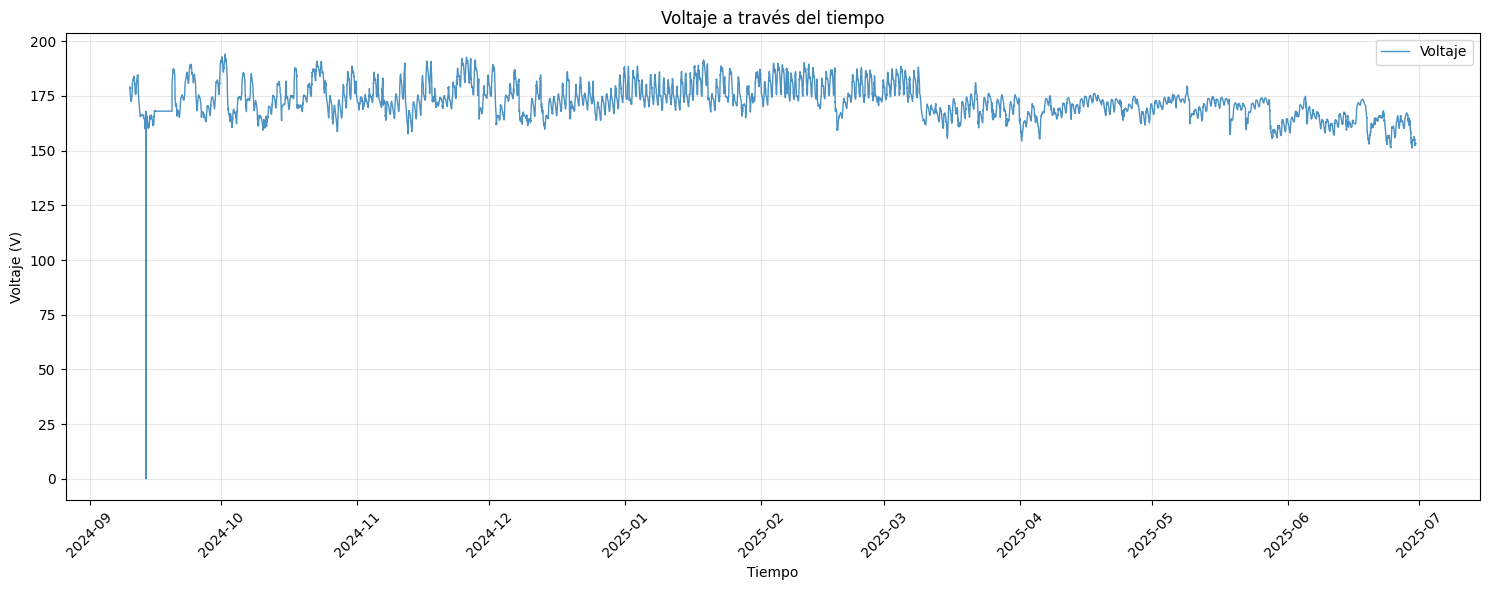

In [22]:
b = pd.read_csv("../data/bronze/temperatura_burbujeo_cleaned.csv")
#establecer el indice como timestamp
b["timestamp"] = pd.to_datetime(b["timestamp"])
b.set_index("timestamp", inplace=True)
b.dropna(inplace=True)  # Eliminar filas con valores nulos
#graficar voltaje a traves del tiempo
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(b.index, b["value"], label="Voltaje", linewidth=1, alpha=0.8)
ax.set_title("Voltaje a través del tiempo")
ax.set_xlabel("Tiempo")
ax.set_ylabel("Voltaje (V)")
ax.legend(["Voltaje"])
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
def graficar_variables_tiempo(df, figsize=(15, 12)):
    """
    Crea gráficas individuales de cada variable a través del tiempo.
    """
    # Obtener columnas numéricas
    cols_num = df.select_dtypes(include=['number']).columns.tolist()
    num_cols = 2  # Número de columnas en el subplot
    num_rows = (len(cols_num) + num_cols - 1) // num_cols
    
    # Crear subgráficos
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)
    fig.suptitle('Comportamiento de Variables a través del Tiempo', fontsize=16)
    axes = axes.flatten() if num_rows > 1 else [axes] if num_cols == 1 else axes
    
    # Generar gráficos individuales
    for i, col in enumerate(cols_num):
        axes[i].plot(df.index, df[col], linewidth=0.8, alpha=0.8)
        axes[i].set_title(f'{col}', fontsize=12)
        axes[i].set_xlabel('Tiempo')
        axes[i].set_ylabel('Valor')
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', rotation=45)
    
    # Ocultar subplots vacíos
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Usar la función
df_silver = pd.read_parquet("../data/silver/silver_data.parquet")
graficar_variables_tiempo(df_silver)

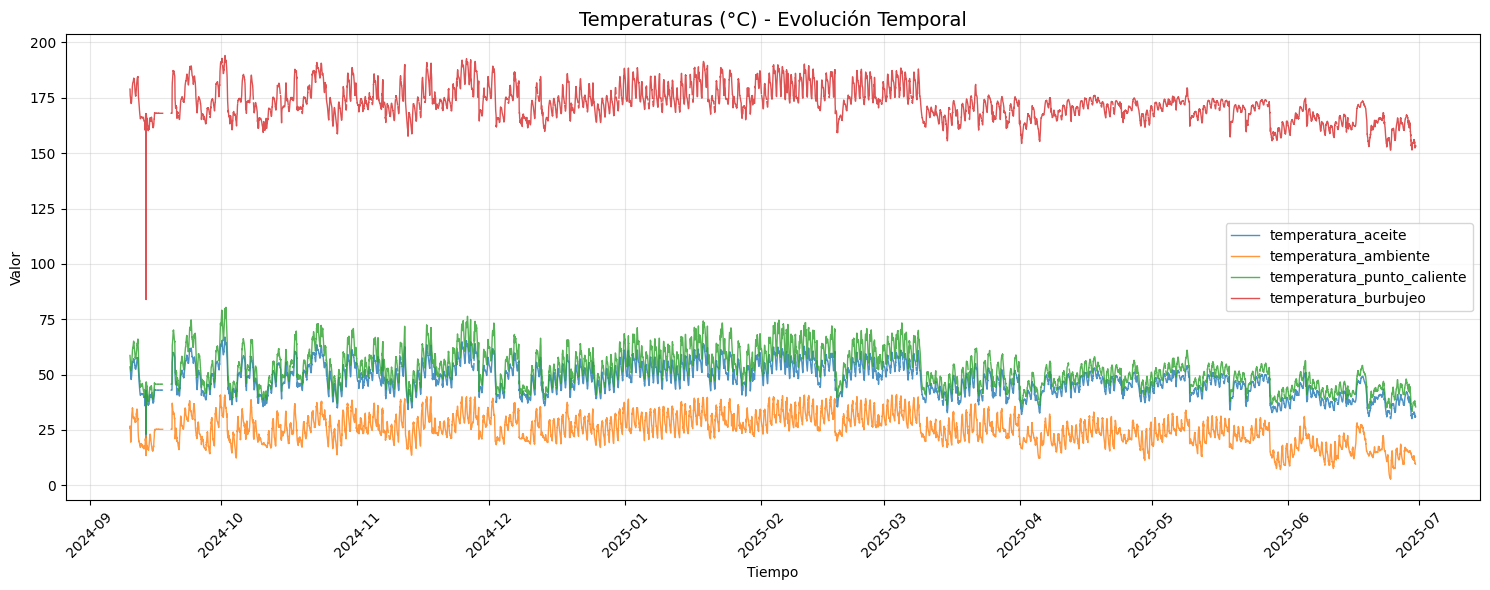

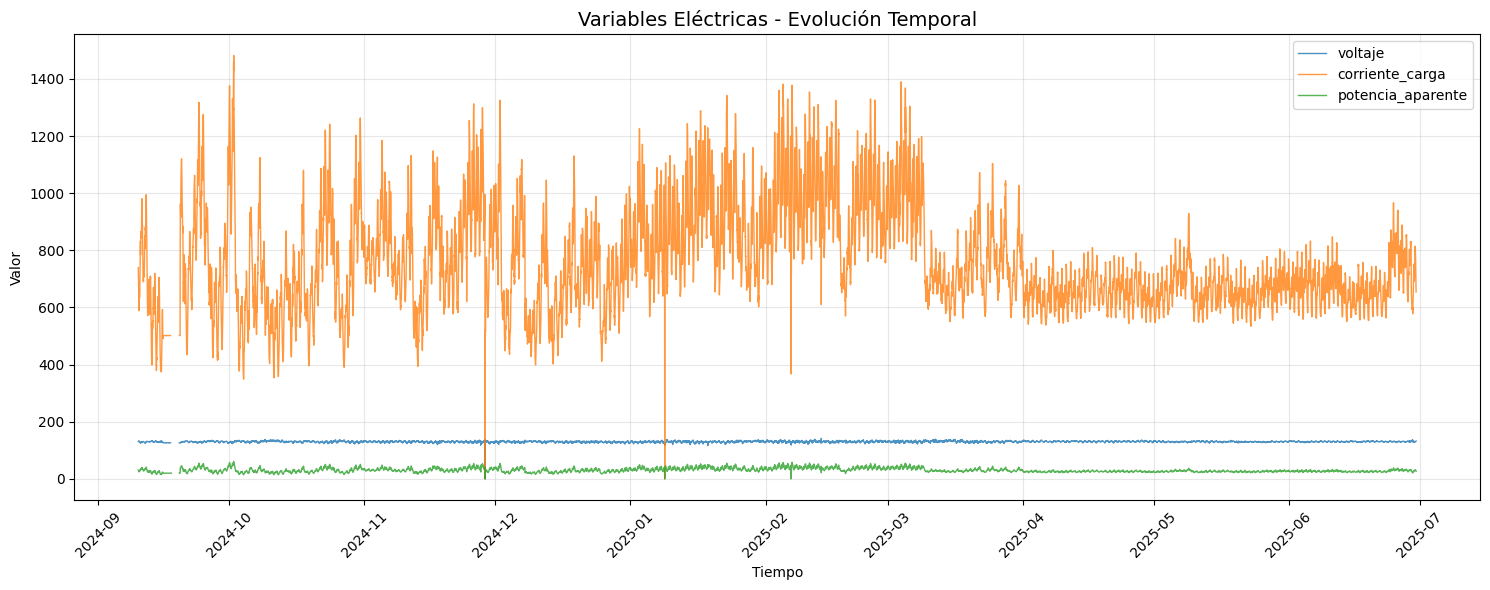

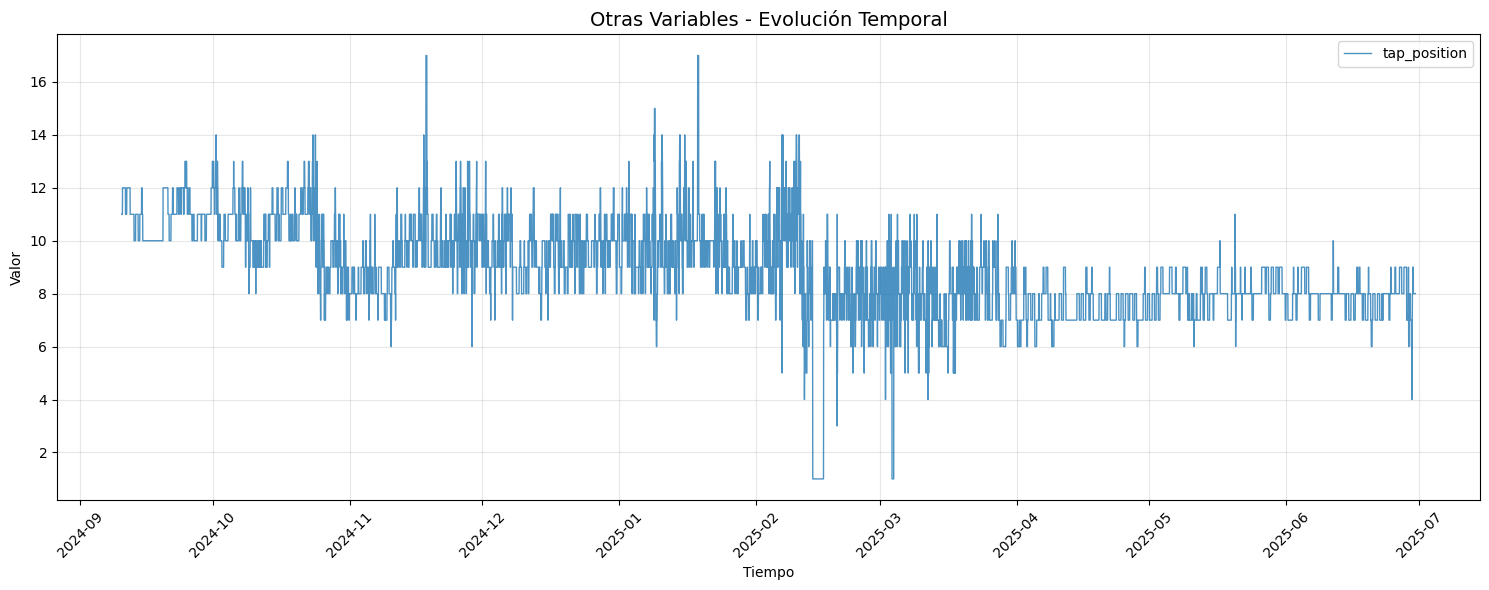

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df_silver = pd.read_parquet("../data/silver/silver_data.parquet")
def graficar_por_categorias(df):
    """
    Separa las variables por categorías y las grafica.
    """
    # Definir categorías
    temperaturas = ['temperatura_aceite', 'temperatura_ambiente', 'temperatura_punto_caliente', 'temperatura_burbujeo']
    electricas = ['voltaje', 'corriente_carga', 'potencia_aparente']
    otras = ['tap_position']
    
    categorias = {
        'Temperaturas (°C)': temperaturas,
        'Variables Eléctricas': electricas,
        'Otras Variables': otras
    }
    
    for categoria, variables in categorias.items():
        # Filtrar variables que existen en el DataFrame
        vars_existentes = [var for var in variables if var in df.columns]
        
        if not vars_existentes:
            continue
            
        fig, ax = plt.subplots(figsize=(15, 6))
        
        for var in vars_existentes:
            ax.plot(df.index, df[var], label=var, linewidth=1, alpha=0.8)
        
        ax.set_title(f'{categoria} - Evolución Temporal', fontsize=14)
        ax.set_xlabel('Tiempo')
        ax.set_ylabel('Valor')
        ax.legend()
        ax.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Usar la función
graficar_por_categorias(df_silver)

In [ ]:
df.isnull().sum()

voltaje                         326
corriente_carga                 268
temperatura_aceite             5839
temperatura_ambiente           2745
temperatura_punto_caliente    15242
temperatura_burbujeo          18872
tap_position                     24
dtype: int64

In [ ]:
verificar=pd.read_parquet("../data/silver/silver_data.parquet")
#print(verificar['timestamp'].apply(type).value_counts())
verificar.head(40)

,voltaje,corriente_carga,temperatura_aceite,temperatura_ambiente,temperatura_punto_caliente,temperatura_burbujeo,tap_position
timestamp,,,,,,,
2024-09-10 04:00:00,131.041825,739.327177,NaN,26.500000,NaN,178.928398,NaN
2024-09-10 04:15:00,130.693073,728.593612,53.500000,26.650000,58.642727,NaN,NaN
2024-09-10 04:30:00,130.812457,715.310359,53.342857,26.800000,NaN,178.781570,NaN
2024-09-10 04:45:00,130.924854,701.814300,53.185714,26.600000,NaN,178.411140,NaN
2024-09-10 05:00:00,130.564417,688.681148,53.028571,26.233334,NaN,176.250397,NaN
2024-09-10 05:15:00,130.947408,679.651644,NaN,25.866667,57.304115,NaN,NaN
2024-09-10 05:30:00,131.011387,671.082906,NaN,25.500000,57.232162,NaN,NaN
2024-09-10 05:45:00,131.140706,663.630621,NaN,26.299999,56.913330,NaN,NaN
2024-09-10 06:00:00,131.046645,656.529251,52.400000,26.500000,NaN,NaN,NaN


In [ ]:
silver=pd.read_parquet("../data/bronze/voltaje.parquet")
print(f"JAJAJAJJAJA {silver['timestamp'].iloc[42462:42481]}")

JAJAJAJJAJA 42462    2024-09-14T02:04:58.8490142Z
42463            2024-09-14T02:05:09Z
42464    2024-09-14T02:05:18.9500122Z
42465     2024-09-14T02:05:29.004013Z
42466    2024-09-14T02:05:38.9570007Z
42467    2024-09-14T02:05:48.9100036Z
42468     2024-09-14T02:06:08.905014Z
42469    2024-09-14T02:06:18.9590148Z
42470    2024-09-14T02:06:23.9830017Z
42471    2024-09-14T02:06:28.9090118Z
42472    2024-09-14T02:06:33.9350128Z
42473    2024-09-14T02:06:38.9440002Z
42474    2024-09-14T02:06:43.8660125Z
42475    2024-09-14T02:06:53.9180145Z
42476    2024-09-14T02:07:08.8970031Z
42477     2024-09-14T02:07:14.024002Z
42478    2024-09-14T02:07:23.9700012Z
42479    2024-09-14T02:07:38.9400024Z
42480            2024-09-14T02:07:49Z
Name: timestamp, dtype: object


In [ ]:
verificar.iloc[60518:60548]

,timestamp,value
60518,2024-09-14T02:05:09Z,588.245361
60519,2024-09-14T02:05:13.9240112Z,587.881042
60520,2024-09-14T02:05:18.9500122Z,589.483948
60521,2024-09-14T02:05:23.977005Z,588.656982
60522,2024-09-14T02:05:29.004013Z,589.012451
60523,2024-09-14T02:05:34.0280151Z,590.581604
60524,2024-09-14T02:05:38.9570007Z,588.480957
60525,2024-09-14T02:05:43.9870147Z,588.210144
60526,2024-09-14T02:05:53.9350128Z,589.816772
60527,2024-09-14T02:05:58.9590148Z,588.949585


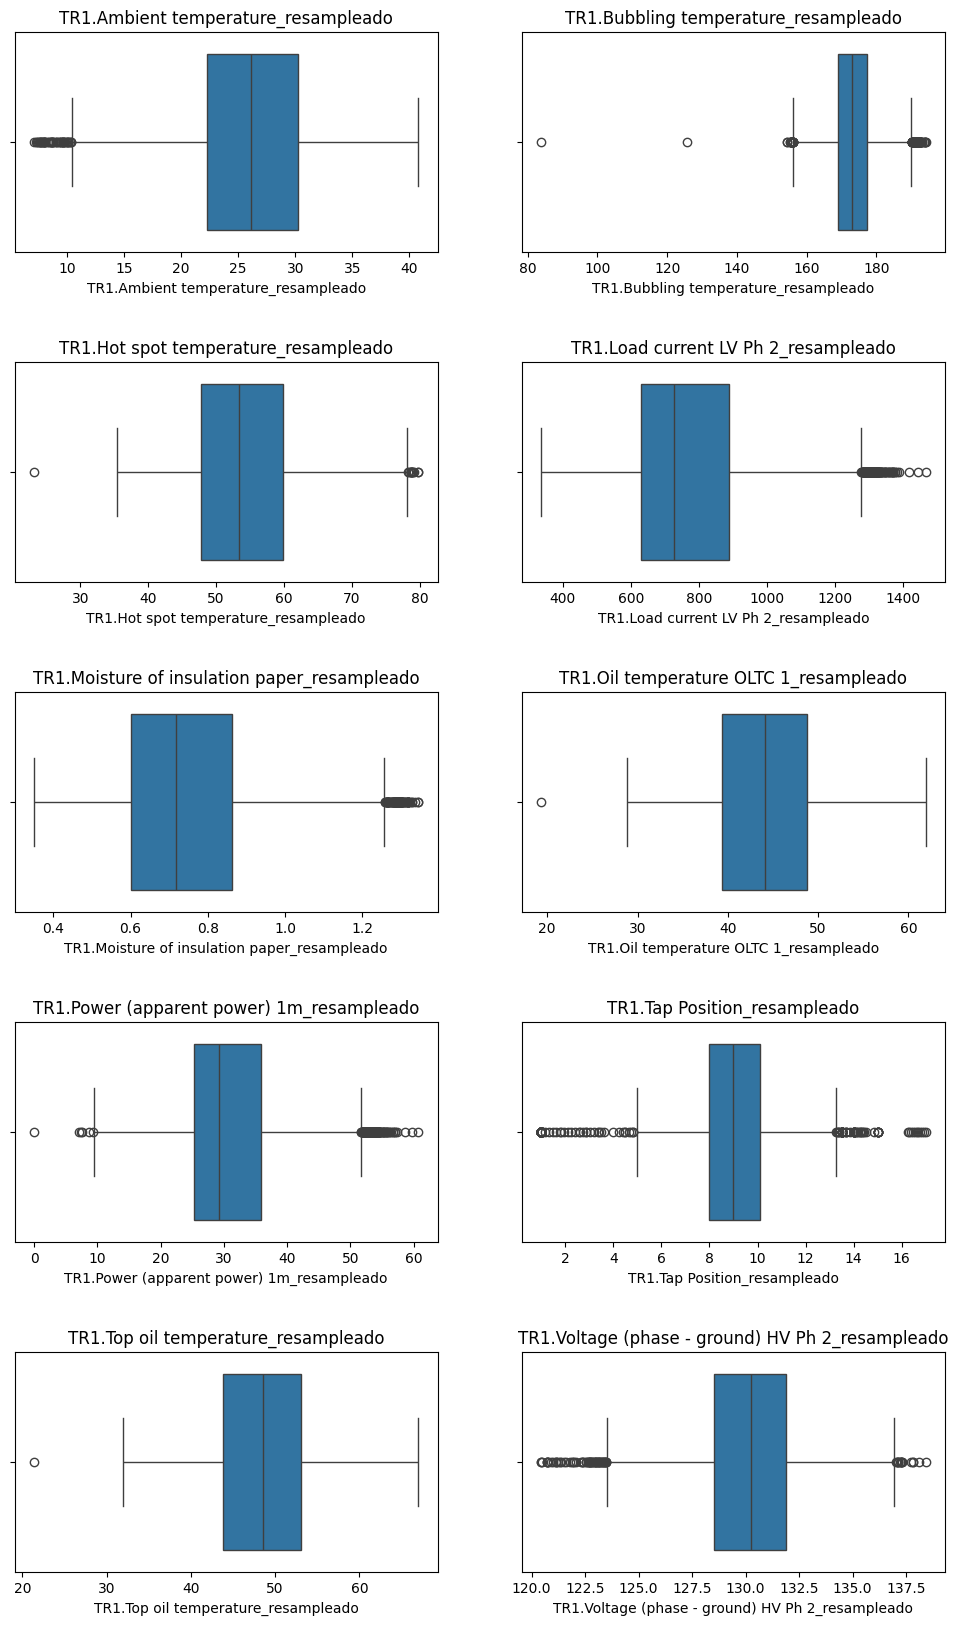

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
voltaje=pd.read_csv("../data/procesada/combined_data.csv")
boxplots(voltaje)

In [ ]:
def filtrar_outliers_iqr_con_rango(df):
    """
    Filtra outliers de cada variable numérica usando el método IQR y muestra
    los rangos mínimo y máximo después de filtrar.
    """
    df_filtrado = df.copy()
    numeric_cols = df.select_dtypes(include='number').columns

    rangos = {}

    for col in numeric_cols:
        Q1 = df_filtrado[col].quantile(0.25)
        Q3 = df_filtrado[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_filtrado = df_filtrado[(df_filtrado[col] >= lower_bound) & (df_filtrado[col] <= upper_bound)]

        # Guardar el rango limpio
        rango_min = df_filtrado[col].min()
        rango_max = df_filtrado[col].max()
        rangos[col] = (rango_min, rango_max)

    return df_filtrado, rangos

# Uso:
dfclean, rangos = filtrar_outliers_iqr_con_rango(voltaje)

# Mostrar rangos
for col, (min_val, max_val) in rangos.items():
    print(f"Variable: {col} -> Min: {min_val:.2f}, Max: {max_val:.2f}")


Variable: TR1.Ambient temperature_resampleado -> Min: 10.40, Max: 40.80
Variable: TR1.Bubbling temperature_resampleado -> Min: 156.31, Max: 189.99
Variable: TR1.Hot spot temperature_resampleado -> Min: 36.58, Max: 74.70
Variable: TR1.Load current LV Ph 2_resampleado -> Min: 337.37, Max: 1264.21
Variable: TR1.Moisture of insulation paper_resampleado -> Min: 0.41, Max: 1.24
Variable: TR1.Oil temperature OLTC 1_resampleado -> Min: 29.10, Max: 59.37
Variable: TR1.Power (apparent power) 1m_resampleado -> Min: 14.58, Max: 50.69
Variable: TR1.Tap Position_resampleado -> Min: 5.00, Max: 13.00
Variable: TR1.Top oil temperature_resampleado -> Min: 33.70, Max: 62.90
Variable: TR1.Voltage (phase - ground) HV Ph 2_resampleado -> Min: 123.62, Max: 136.93


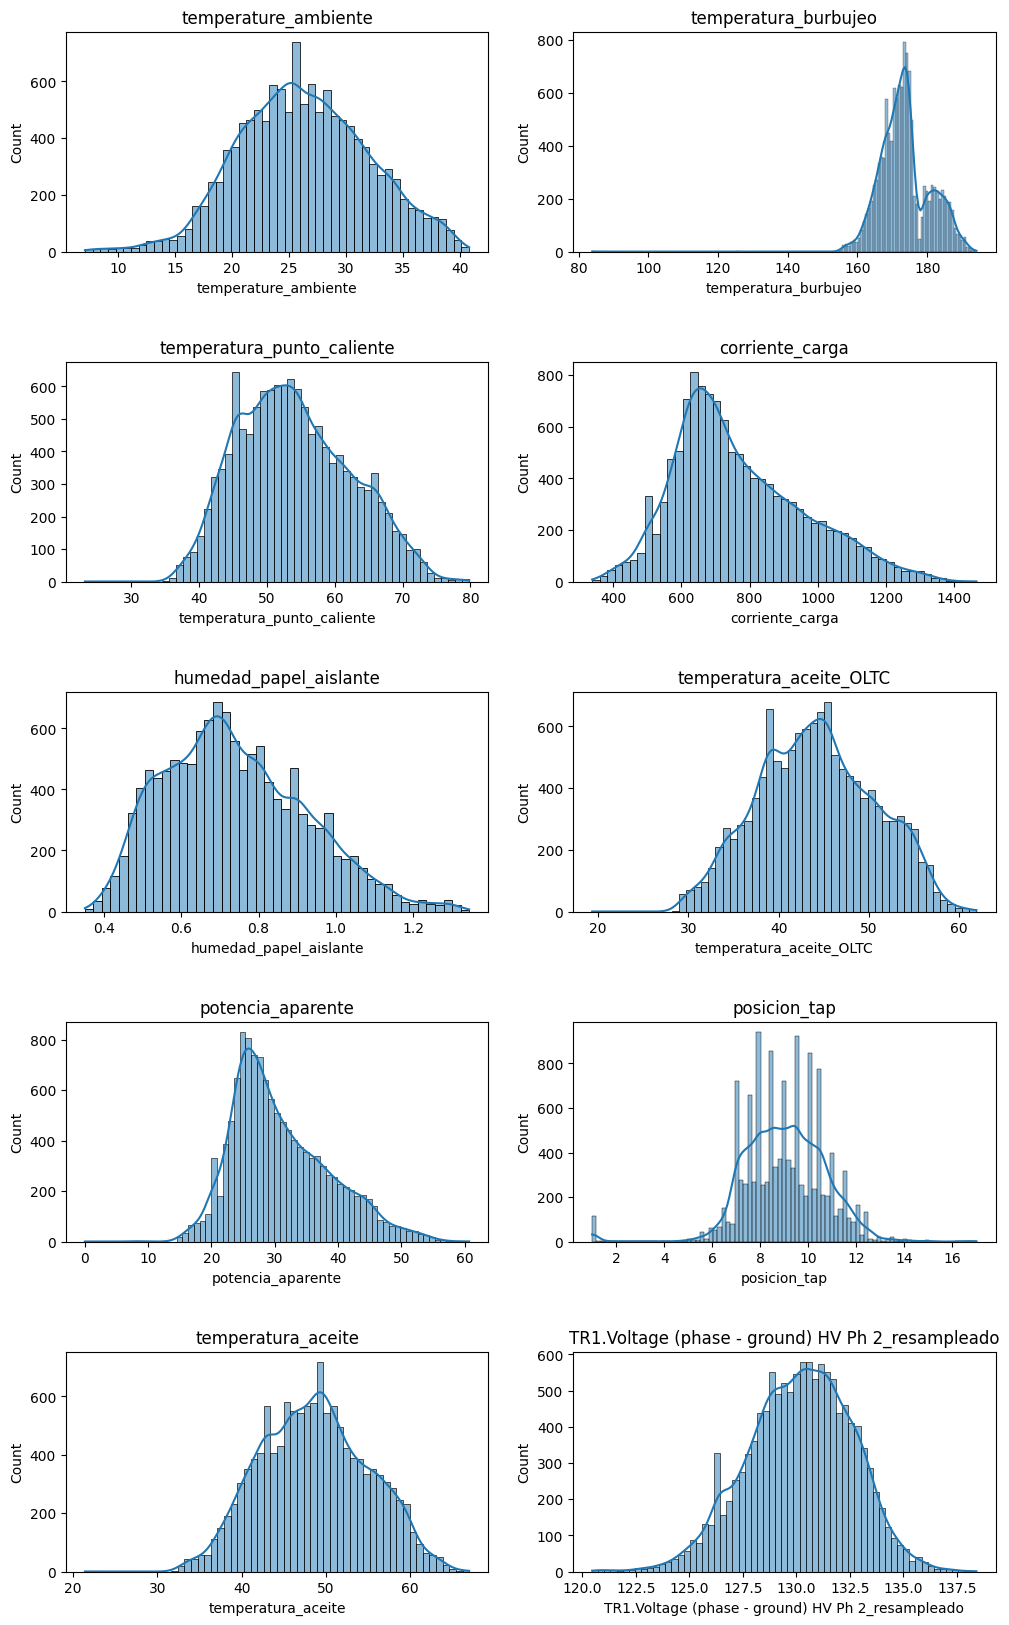

In [ ]:
hist(df_combined)

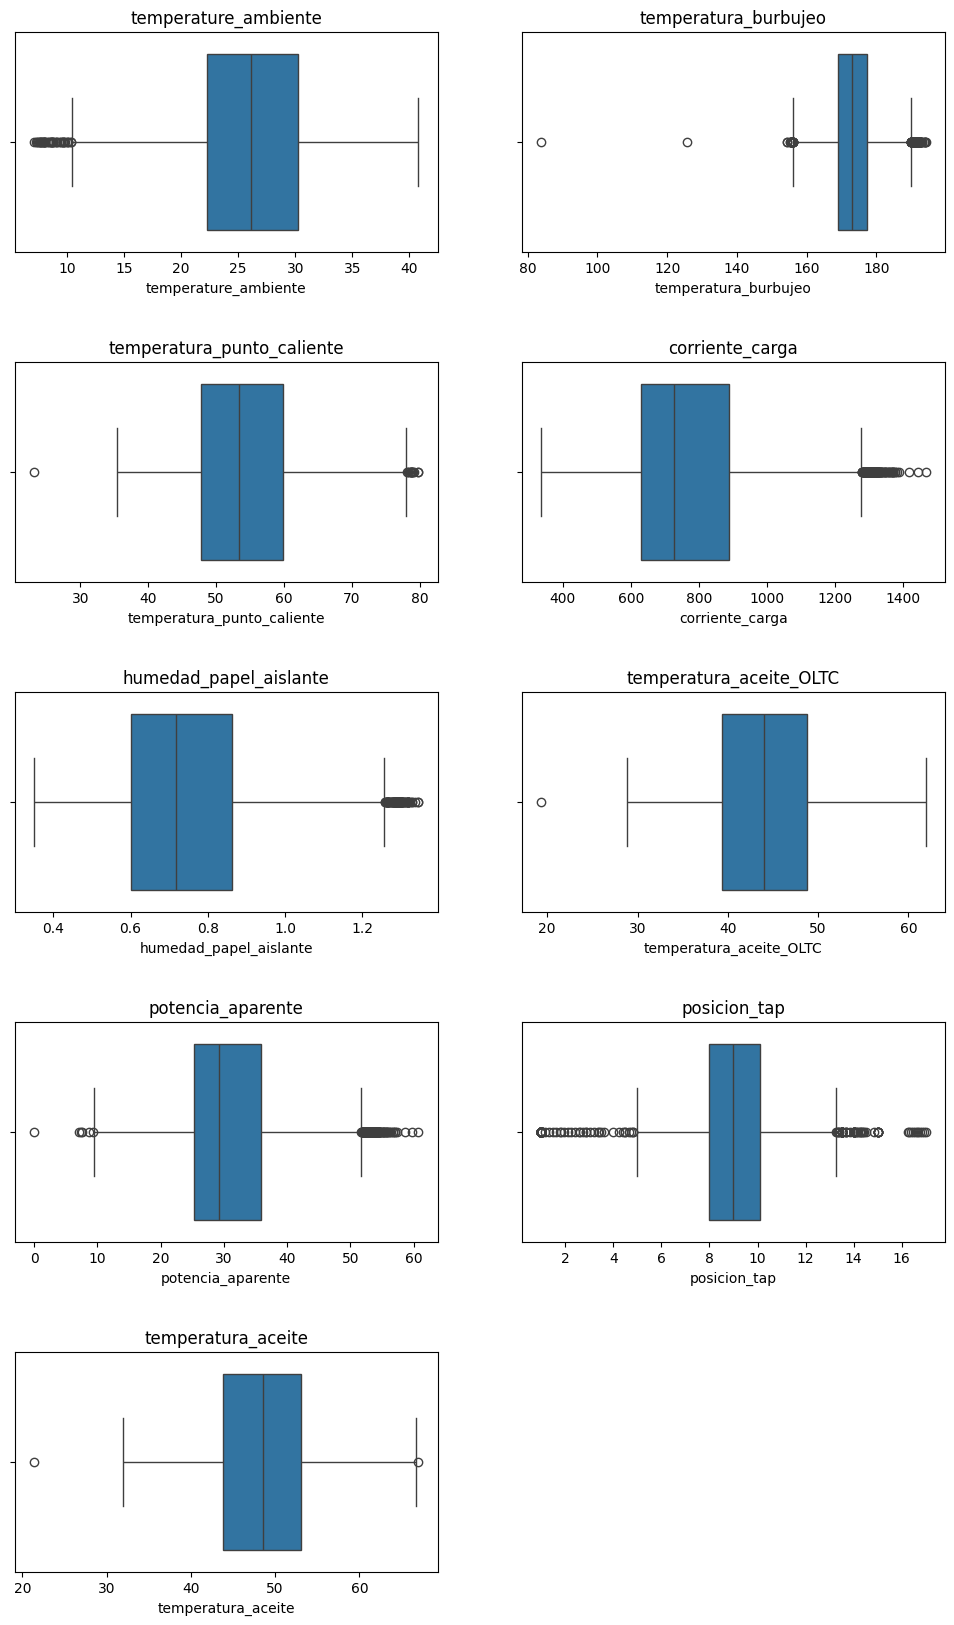

In [ ]:
boxplots(df_combined)

In [ ]:
print (f'Tamanio del set despues de eliminarl el regitro de edades {df_combined.shape}')

#Filtrar por valores atípicos

df_combined = df_combined[(df_combined['temperatura_burbujeo'] > 140) &
                           (df_combined['temperatura_punto_caliente'] > 35) &
                           (df_combined['corriente_carga'] < 1250)]
df_combined.drop_duplicates(inplace=True)

print (f'Tamanio del set despues de eliminarl el regitro de edades {df_combined.shape}')

Tamanio del set despues de eliminarl el regitro de edades (12617, 9)
Tamanio del set despues de eliminarl el regitro de edades (12262, 9)


In [ ]:
import pandas as pd
aaa=pd.read_csv('../data/procesada/combined_data_ready.csv', index_col=0, parse_dates=True)
aaa.head()
aaa.shape


(12262, 9)

In [ ]:
print(aaa.isnull().sum())


temperatura_ambiente          0
temperatura_burbujeo          0
temperatura_punto_caliente    0
corriente_carga               0
humedad_papel_aislante        0
temperatura_aceite_OLTC       0
potencia_aparente             0
posicion_tap                  0
temperatura_aceite            0
dtype: int64


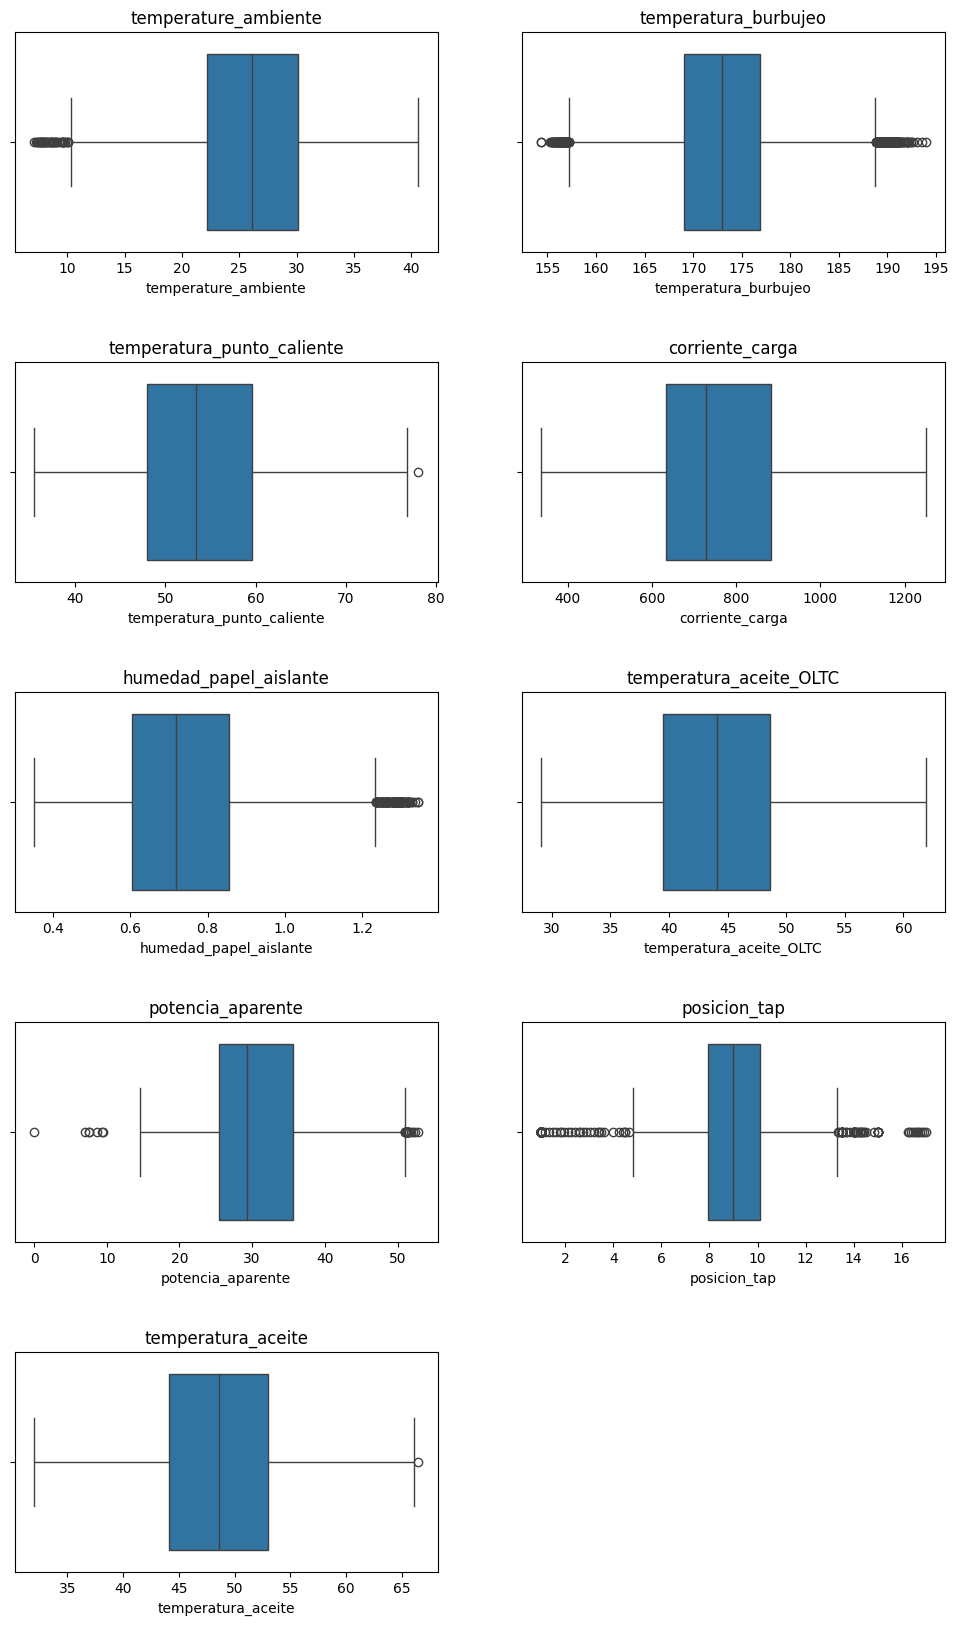

In [ ]:
boxplots(df_combined)

In [ ]:
df_combined.to_csv('../data/procesada/combined_data_cleaned.csv')


In [ ]:
df_bd= pd.read_csv('../data/procesada/combined_data_ready.csv', index_col=0, parse_dates=True)
df_bd.head()

,temperatura_ambiente,temperatura_burbujeo,temperatura_punto_caliente,corriente_carga,humedad_papel_aislante,temperatura_aceite_OLTC,potencia_aparente,posicion_tap,temperatura_aceite
Timestamp,,,,,,,,,
2024-09-10 04:00:00,26.500000,178.928398,58.642727,733.840371,0.587974,51.025001,30.489245,11.0,53.500
2024-09-10 04:30:00,26.733334,178.534617,57.973421,708.433386,0.597363,50.700001,29.445180,11.0,53.225
2024-09-10 05:00:00,26.316667,176.250397,57.304115,684.065427,0.610628,50.375001,28.426628,11.0,52.950
2024-09-10 05:30:00,25.900000,176.001775,57.072746,667.426629,0.623892,50.050001,27.773739,11.0,52.675
2024-09-10 06:00:00,26.000000,175.753153,56.585251,651.429854,0.637156,49.725001,27.144727,11.0,52.400


In [ ]:
import pandas as pd
sucia=pd.read_csv("../data/procesada/combined_data.csv", index_col=0, parse_dates=True)
sucia.head()

,TR1.Ambient temperature_resampleado,TR1.Bubbling temperature_resampleado,TR1.Hot spot temperature_resampleado,TR1.Load current LV Ph 2_resampleado,TR1.Moisture of insulation paper_resampleado,TR1.Oil temperature OLTC 1_resampleado,TR1.Power (apparent power) 1m_resampleado,TR1.Tap Position_resampleado,TR1.Top oil temperature_resampleado,TR1.Voltage (phase - ground) HV Ph 2_resampleado
Timestamp,,,,,,,,,,
2024-09-09 22:00:00,27.650000,182.022125,46.909760,894.668196,0.539988,52.500000,NaN,6.000000,37.166667,128.329028
2024-09-09 22:30:00,26.799999,181.887016,62.881384,913.560304,0.542497,52.483334,NaN,6.857143,46.333333,128.646620
2024-09-09 23:00:00,26.400000,181.751369,62.968920,927.463050,0.545007,52.466667,NaN,7.714286,55.500000,129.106956
2024-09-09 23:30:00,26.000000,181.615723,63.195588,940.645803,0.547516,52.450001,NaN,8.571429,55.433333,129.221010
2024-09-10 00:00:00,25.299999,181.410370,62.843075,930.434031,0.552483,52.433334,NaN,9.428571,55.366666,129.704919


In [ ]:
valor=pd.read_csv("../data/formateada/TR1.Power (apparent power) 1m_resampleado.csv")
valor.head()

,Timestamp,temp
0,2024-09-10 04:00:00,30.489245
1,2024-09-10 04:30:00,29.445180
2,2024-09-10 05:00:00,28.426628
3,2024-09-10 05:30:00,27.773739
4,2024-09-10 06:00:00,27.144727
